###  Plotting with matplotlib
There are many librarie available for plotting but the default library is matplotlib. Another useful library is called seaborn

In [25]:
import matplotlib.pyplot as plt    #    using part of the library (pyplot), as 'plt' is a convention
%matplotlib inline    #   magic command to display plots right in Notebook
#    First approach : functional method

ModuleNotFoundError: No module named 'pd'

In [2]:
#   Let's create some data for our first plot
x = range(0,10)
y = [i**2 for i in x]

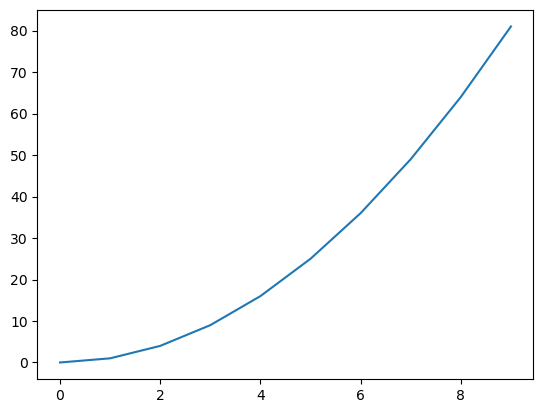

In [3]:
#  Basic line plot
plt.plot(x,y)

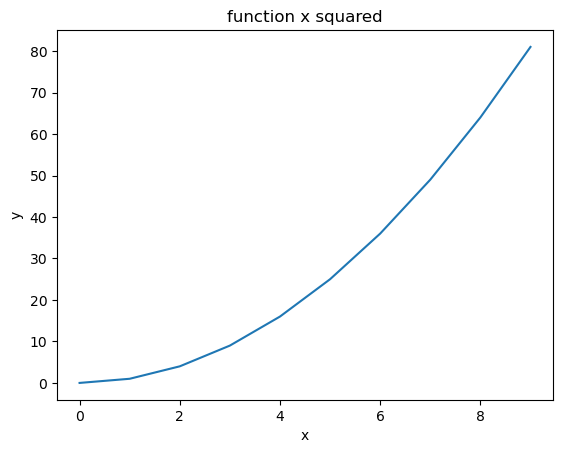

In [5]:
plt.title('function x squared')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)

Text(0.5, 1.0, 'Square root of x')

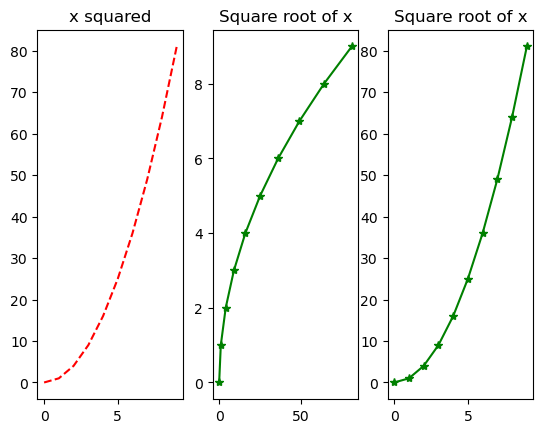

In [13]:
#     More than one plot suing plt.subplot()
plt.subplot(1,3,1)   #  numbers of rows, number of columns, plot number
plt.plot(x,y, 'r--')    #   check documentation for all formatting possibilities
plt.title("x squared")

plt.subplot(1,3,2)
plt.plot(y,x, 'g*-')
plt.title("Square root of x")

plt.subplot(1,3,3)
plt.plot(x,y,'g*-')
plt.title("X Square")

#   OOP approach to matplotlib:
There are two key ingredients: "figure" and "axes". "Figure" is the canvas in the background while Axes are the actual plots. Axes always live on a figure object

Text(0.5, 1.0, 'Graph of x squared')

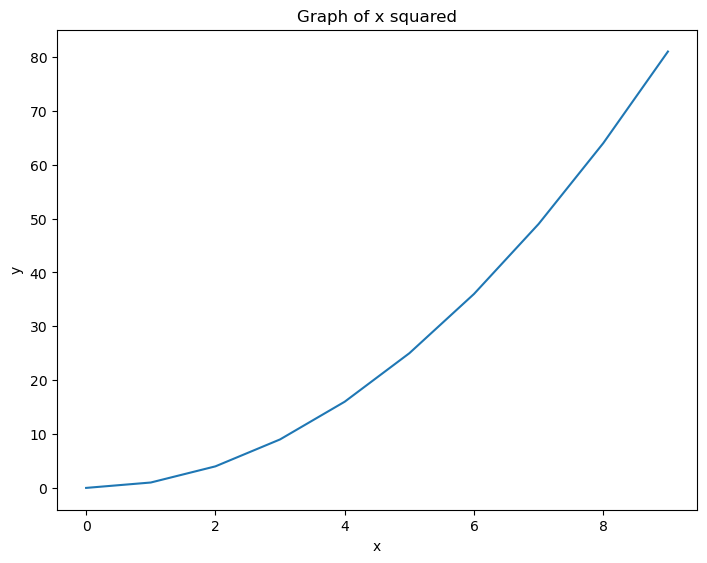

In [17]:
#   Create variables
x = range(0,10)
y = [i**2 for i in x]

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])    #  left position, bottom position, width, heigth
axes.plot(x,y)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Graph of x squared')

Text(0.5, 1.0, 'square root of x')

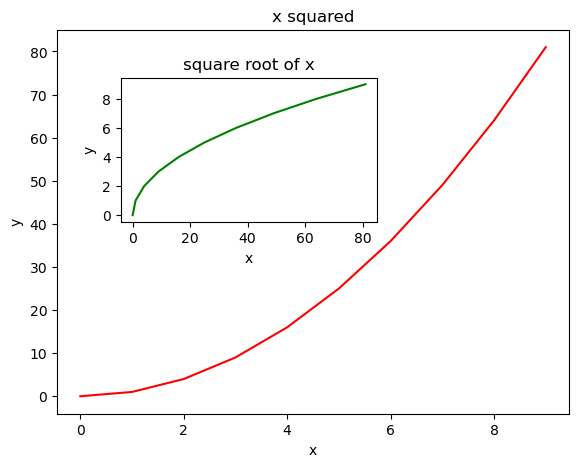

In [21]:
#   Plot within a plot
fig = plt.figure()

axes1 = fig.add_axes([0,0,0.8,0.8])
axes2 = fig.add_axes([0.1,0.4,0.4,0.3])

#   Main figure
axes1.plot(x,y,'r')    # r for red
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('x squared')

#  Insert second figure
axes2.plot(y,x,'g')     # g for green
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('square root of x')

### Application to stock market data
We are goin to use one of Gabor's ata sets, but if you want to quickly download stock market data: check out yfinance

In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://osf.io/4pgrf/download')

In [31]:
df.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.10,15.17,11.497672,15.00,15.29,34994300.0
1,ACN,2001-07-20,15.05,15.01,11.376402,14.80,15.05,9238500.0
2,ACN,2001-07-23,15.00,15.00,11.368821,14.55,15.01,7501000.0
3,ACN,2001-07-24,14.95,14.86,11.262713,14.70,14.97,3537300.0
4,ACN,2001-07-25,14.70,14.95,11.330926,14.65,14.95,4208100.0


In [34]:
#   How many observations
print(f'Our data set has {df.shape[0]}) observations.')
df.shape

Our data set has 304859) observations.


(304859, 8)

In [37]:
df.describe()        # some basic descriptives with database analysis

,price.open,price.close,price.adjusted,price.low,price.high,volume
count,304859.000000,304859.000000,304859.000000,304859.000000,304859.000000,3.048590e+05
mean,41.002155,41.007271,36.693450,40.441201,41.549748,1.099746e+07
std,39.229546,39.219895,37.850934,38.770172,39.658621,2.536388e+07
min,0.207031,0.192708,0.187803,0.145833,0.210938,0.000000e+00
25%,17.750000,17.750000,14.633619,17.440001,18.049999,1.458900e+06
50%,28.760000,28.770000,23.682230,28.320000,29.200001,3.358100e+06
75%,49.675655,49.700001,44.555153,49.000000,50.329691,9.159700e+06
max,344.187500,327.625000,327.625000,320.000000,345.500000,1.855410e+09


In [38]:
df.ticker.value_counts()            # checking number of observation per ticker (company short code)

XLNX    5287
SYMC    5287
TXN     5287
IT      5287
SNPS    5287
        ... 
ANET    1152
KEYS    1058
QRVO    1007
PYPL     881
HPE      807
Name: ticker, Length: 68, dtype: int64

In [39]:
#  What object is     ref.date ?
print(type(df["ref.date"]))

<class 'pandas.core.series.Series'>


In [40]:
#  alternative method
df["ref.date"].describe()

count         304859
unique          5287
top       2017-08-11
freq              68
Name: ref.date, dtype: object

In [42]:
#    It is not a datetime object / need to convert
df["ref.date"] = pd.to_datetime(df["ref.date"])

In [43]:
print(type(df["ref.date"]))

<class 'pandas.core.series.Series'>


In [44]:
df["ref.date"].describe()            # other way with more information

C:\Users\ceder\AppData\Local\Temp\ipykernel_25184\4101372361.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["ref.date"].describe()


count                  304859
unique                   5287
top       2017-08-11 00:00:00
freq                       68
first     1997-12-29 00:00:00
last      2019-01-02 00:00:00
Name: ref.date, dtype: object

In [45]:
print(type(df["ref.date"].iloc[0]))     # checks the specific format

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [54]:
#   Plot data for MSFT
date = list(df.loc[df["ticker"] == "MSFT"]["ref.date"])
#   above : need to specify "ref date" at the end to get only the date data
price = list(df.loc[df["ticker"] == "MSFT"]["price.close"])

In [55]:
#   use OOP paradigm to add average price to plot
mean_price = np.mean(price)
mean_price

37.29403605012294

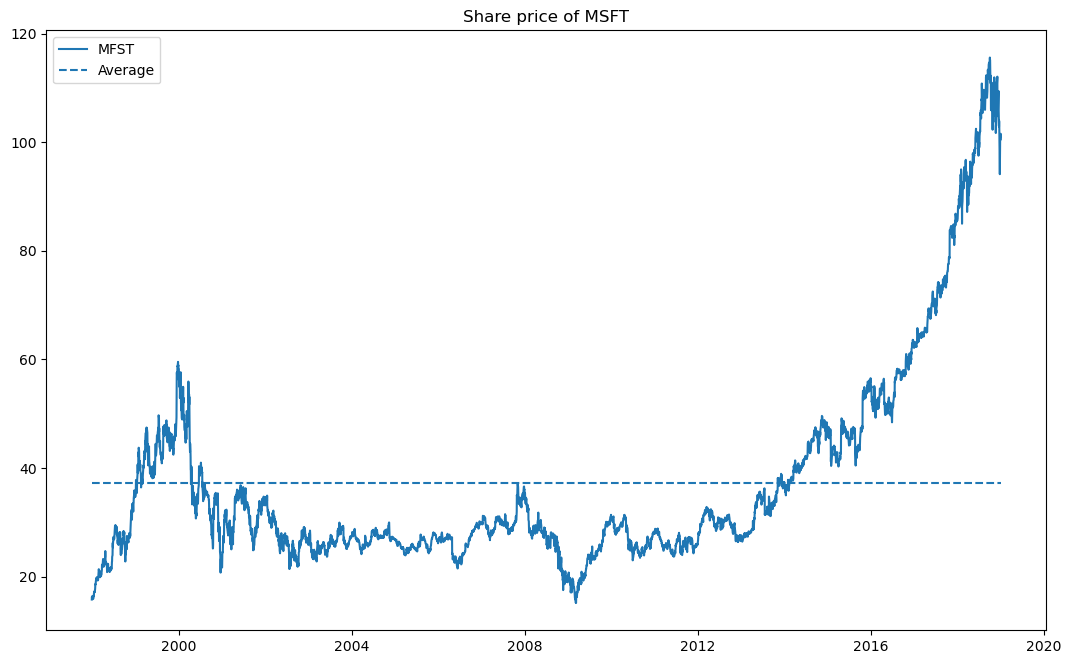

In [60]:
#    Create figure
fig = plt.figure(figsize=(10,6))

#   Add axes object
ax = fig.add_axes([0,0,1,1])
ax.plot(date, price, label="MFST")
ax.hlines(y=mean_price, xmin=date[0], xmax=date[-1], linestyle="--", label ="Average")
ax.set_title('Share price of MSFT')
ax.legend(loc='upper left')